## Heart Disease Clasification
1. Gerekli Kütüphanelerin İçe Aktarılması

İlk olarak, gerekli Python kütüphanelerini yükleyerek veri analizi, model eğitimi ve değerlendirmesi için gerekli araçları sağlayacağız.



In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


2. Veri Setinin Yüklenmesi ve Ön İşlenmesi

UCI Heart Disease Dataset'ini yükleyeceğiz. Bu veri seti genellikle .csv formatında olduğundan, Pandas ile veri çerçevesine aktaracağız.

In [35]:
# Veri setini indir
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, header=None, names=columns)



## Veri Seti Özellikleri

Bu veri seti toplamda **76 özellik** içermektedir, ancak çoğu çalışmada yalnızca **14 özellik** kullanılmaktadır. Cleveland veri seti, makine öğrenmesi araştırmalarında yaygın olarak kullanılan tek veri setidir.

### Hedef Değişken: `num`
- `num`: Kalp hastalığının varlığı (0 = hastalık yok, 1 = hastalık var).

### Kullanılan 14 Özellik
Aşağıdaki 14 özellik, bu veri setindeki temel parametreleri temsil eder ve sıklıkla kalp hastalığını tahmin etmek için kullanılır:

1. **age**: Yaş
2. **sex**: Cinsiyet (1 = erkek, 0 = kadın)
3. **cp**: Göğüs ağrısı türü
    - 1: Tipik angina
    - 2: Atipik angina
    - 3: Non-anginal ağrı
    - 4: Asemptomatik
4. **trestbps**: Dinlenme kan basıncı (mm Hg)
5. **chol**: Serum kolesterol (mg/dl)
6. **fbs**: Açlık kan şekeri > 120 mg/dl (1 = doğru, 0 = yanlış)
7. **restecg**: Dinlenme EKG sonuçları
    - 0: Normal
    - 1: ST-T dalga anormalliği
    - 2: Sol ventriküler hipertrofi
8. **thalach**: Maksimum kalp hızı
9. **exang**: Egzersizle ilişkili anjina (1 = evet, 0 = hayır)
10. **oldpeak**: Egzersizle ilişkili ST depresyonu
11. **slope**: Egzersiz ST segmentinin eğimi
    - 1: Yukarı doğru
    - 2: Düz
    - 3: Aşağı doğru
12. **ca**: Fluoroskopi ile tespit edilen ana damar sayısı (0-3)
13. **thal**: Thallium testi sonucu
    - 3: Normal
    - 6: Sabit defekt
    - 7: Tersine çevrilebilir defekt
14. **num**: Kalp hastalığı durumu (0 = hastalık yok, 1 = hastalık var)

3. Hedef Değişkenin Düzenlenmesi

Hedef değişken (target) iki sınıf içerir: 0 (hastalık yok) ve 1 (hastalık var). Veriyi ikili sınıflandırma için uygun hale getireceğiz.

Veri setinde yer alan '?' karakterleri, eksik veri olarak kabul edilmiştir. Bu karakterleri NaN (Not a Number) ile değiştirdik ve ardından eksik verileri içeren satırları kaldırdık.

replace('?', np.nan): '?' karakterlerini NaN (eksik değer) ile değiştirir.
    
dropna(): Satırlarda NaN içeren tüm satırları veri setinden çıkarır.
    
astype(float): Verileri sayısal (float) tipe dönüştürür, böylece makine öğrenimi algoritmaları ile uyumlu hale gelir.

In [36]:
# Eksik verileri temizle
data = data.replace('?', np.nan)  # '?' karakterlerini NaN olarak değiştir
data = data.dropna()  # Eksik değerleri içeren satırları kaldır
data = data.astype(float)  # Verileri sayısal tipe çevir

# Hedef değişkeni ikili sınıflandırma için düzenle (0: hastalık yok, 1: hastalık var)
data['target'] = data['target'].apply(lambda x: 0 if x == 0 else 1)

4.Eğitim ve Test Setlerine Veri Bölünmesi

Veri setini %80 eğitim ve %20 test oranıyla böleceğiz. Bu oran, modelin genelleme yapmasına olanak sağlar.

In [37]:
# Girdi (X) ve çıktı (y) ayrımı
X = data.drop('target', axis=1)
y = data['target']

# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Verilerin Ölçeklendirilmesi
Modellerin daha iyi çalışabilmesi için verileri standartlaştıracağız. Bu adım, özellikle mesafe tabanlı algoritmalar (KNN, SVM) için önemlidir

In [38]:
# Verileri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


6. Model Seçimi ve Eğitimi

In [39]:
from sklearn.metrics import f1_score

# Performans metriklerini saklama
accuracy = []
precision = []
recall = []
f1_scores = []

# Modelleri eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)  # Modeli eğit
    y_pred = model.predict(X_test)  # Test verisi üzerinde tahmin
    
    # Performans metriklerini hesapla
    accuracy.append(accuracy_score(y_test, y_pred) * 100)
    precision.append(precision_score(y_test, y_pred) * 100)
    recall.append(recall_score(y_test, y_pred) * 100)
    f1_scores.append(f1_score(y_test, y_pred) * 100)


7. Performans Metrikleri: Accuracy, Precision, Recall, F1 Score
Modellerin doğruluğu, kesinliği, geri çağırma oranı ve F1 score'u hesaplanacak ve görselleştirilecektir. Bu metrikler, modelin genel başarısını ölçmek için kullanılır.

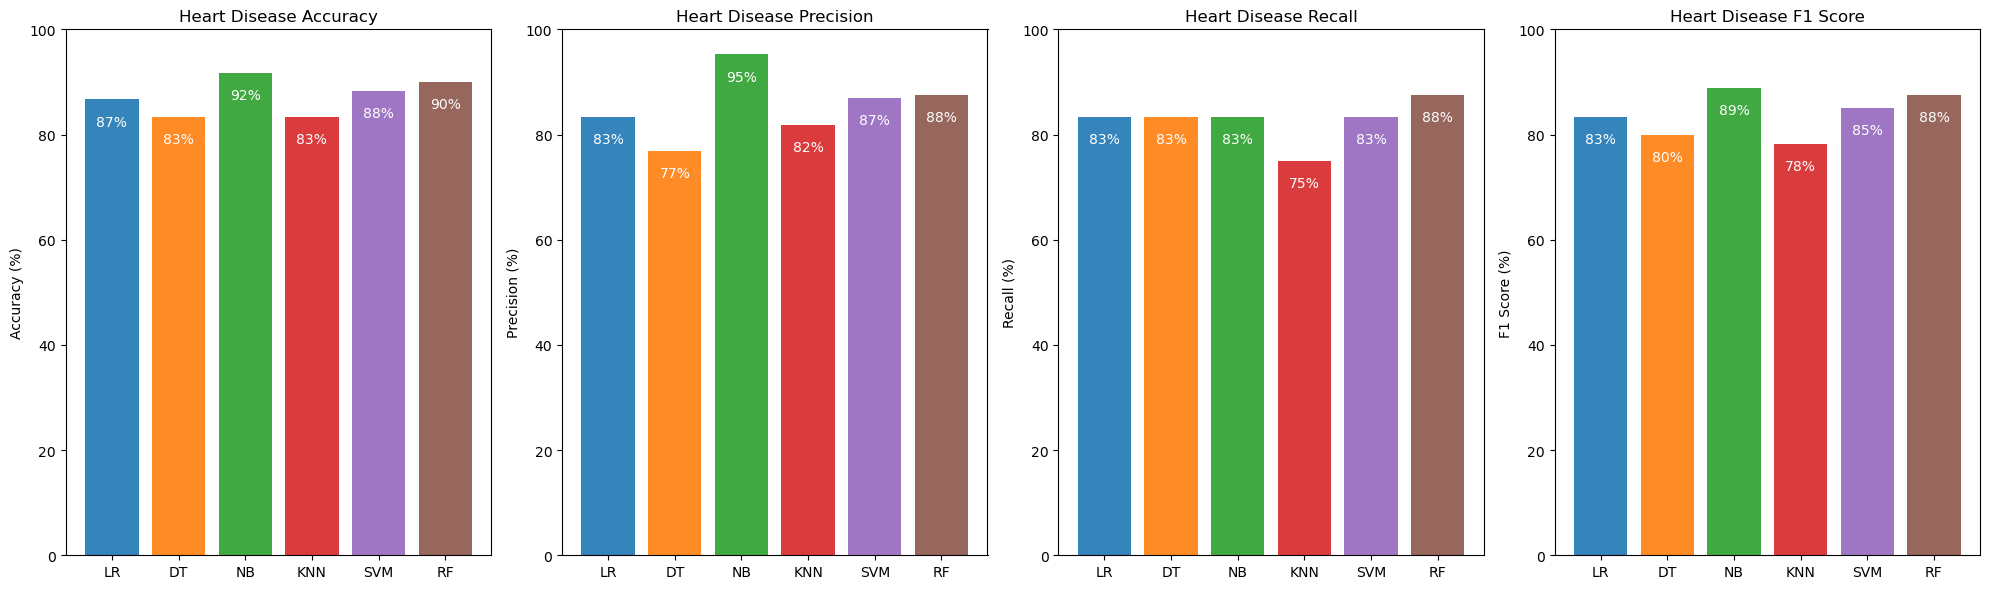

In [40]:
# Çubuk grafikleri çizme
algorithms = list(models.keys())
x = np.arange(len(algorithms))  # X ekseni
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Renk paleti

plt.figure(figsize=(20, 6))

# Doğruluk (Accuracy) Grafiği
plt.subplot(1, 4, 1)
bars = plt.bar(x, accuracy, color=colors, alpha=0.9)
plt.xticks(x, algorithms)
plt.title("Heart Disease Accuracy")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
for bar, val in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{val:.0f}%', ha='center', color='white')

# Kesinlik (Precision) Grafiği
plt.subplot(1, 4, 2)
bars = plt.bar(x, precision, color=colors, alpha=0.9)
plt.xticks(x, algorithms)
plt.title("Heart Disease Precision")
plt.ylabel("Precision (%)")
plt.ylim(0, 100)
for bar, val in zip(bars, precision):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{val:.0f}%', ha='center', color='white')

# Geri Çağırma (Recall) Grafiği
plt.subplot(1, 4, 3)
bars = plt.bar(x, recall, color=colors, alpha=0.9)
plt.xticks(x, algorithms)
plt.title("Heart Disease Recall")
plt.ylabel("Recall (%)")
plt.ylim(0, 100)
for bar, val in zip(bars, recall):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{val:.0f}%', ha='center', color='white')

# F1 Score (F-Measure) Grafiği
plt.subplot(1, 4, 4)
bars = plt.bar(x, f1_scores, color=colors, alpha=0.9)
plt.xticks(x, algorithms)
plt.title("Heart Disease F1 Score")
plt.ylabel("F1 Score (%)")
plt.ylim(0, 100)
for bar, val in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{val:.0f}%', ha='center', color='white')

plt.tight_layout()
plt.show()
